# Предисловие

Преобразование Фурье является важным математическим инструментом, который встречается во многих областях науки и техники. Применений Преобразования Фурье огромное множество. В этой работе я попытаюсь кратко рассказать, что это такое

# Ряд Фурье

Из курса математического анализа нам известен ряд Фурье, который задается следующим образом:
\begin{gather*}
f(x)={\frac {a_{0}}{2}}+\sum _{n=1}^{\infty }(a_{n}\cos( \omega _{n}x)+b_{n}\sin( \omega _{n}x)),\\
\omega _{n} = \frac {n \pi}{l},\\
a_0= \frac{1}{l}\int\limits_{-l}^{l}f(x)dx,\\
a_n= \frac{1}{l}\int\limits_{-l}^{l}f(x)\cos( \omega _{n}x)dx,\\
b_n= \frac{1}{l}\int\limits_{-l}^{l}f(x)\sin( \omega _{n}x)dx
\end{gather*}

Но что это означает на практике?

Продемонстрирую приближение треугольной функции функции с помощь ряда Фурье на Python

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

Как видим, с каждой итерацией приближение становится точнее

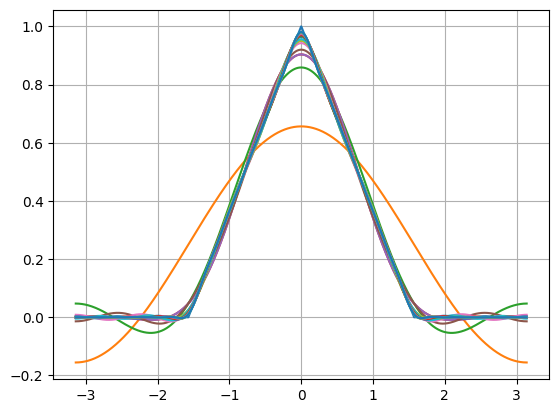

In [42]:
dx = 0.001
L = np.pi
x = L * np.arange(-1 + dx, 1 + dx, dx)
n = len(x)
nquart = int(np.floor(n / 4))

f = np.zeros_like(x)
f[nquart : 2 * nquart] = (4 / n) * np.arange(1, nquart + 1)
f[2 * nquart : 3 * nquart] = np.ones(nquart) - (4 / n) * np.arange(0, nquart)

fig, ax = plt.subplots()
plt.grid(True)
ax.plot(x, f)

A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0 / 2

A = np.zeros(20)
B = np.zeros(20)
for k in range(20):
    A[k] = np.sum(f * np.cos(np.pi * (k + 1) * x / L)) * dx 
    B[k] = np.sum(f * np.sin(np.pi * (k + 1) * x / L)) * dx
    fFS = fFS + A[k] * np.cos((k + 1) * np.pi * x / L) + B[k] * np.sin((k + 1) * np.pi * x / L)
    ax.plot(x, fFS)

На самом деле мы расскладываем сложную функцию на сумму простых гармонических колебаний разной частоты

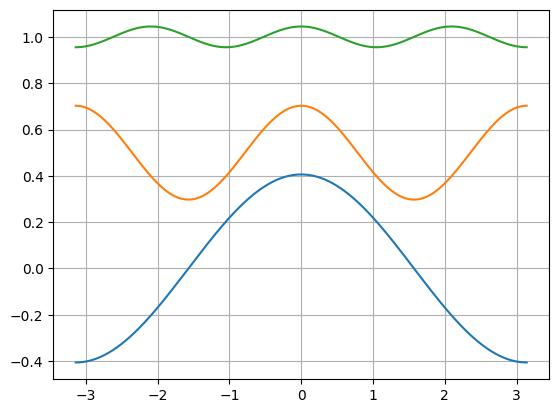

In [57]:
fig, ax = plt.subplots()
plt.grid(True)

for k in range(3):
    ax.plot(x, A[k] * np.cos((k + 1) * np.pi * x / L) + B[k] * np.sin((k + 1) * np.pi * x / L) + k/2)

Более компактно ряд Фурье записывается в комплексной форме:
\begin{gather*}
f(x)=\sum \limits _{n=-\infty }^{\infty }c_{n}e^{i \omega _{n}x} \\
c_{n}={\frac {1}{2l}}\int \limits _{-l}^{l}f(x)e^{-{i \omega _{n}x}}dx
\end{gather*}

# Преобразование Фурье

Эта формула неспроста похожа на ряд Фурье, она напрямую из него следует:

\begin{gather*}
{\hat  {f}}(\omega )={\frac  {1}{{\sqrt  {2\pi }}}}\int \limits _{{-\infty }}^{{\infty }}f(x)e^{{-ix\omega }}\,dx, \\
\end{gather*}

Мы уже показали, что можно представить функцию в виде суммы гармонических колебаний. Развивая эту идею, Фурье смог сопоставить функции её спектр, то есть набор колебаний разной частоты и амплитуды

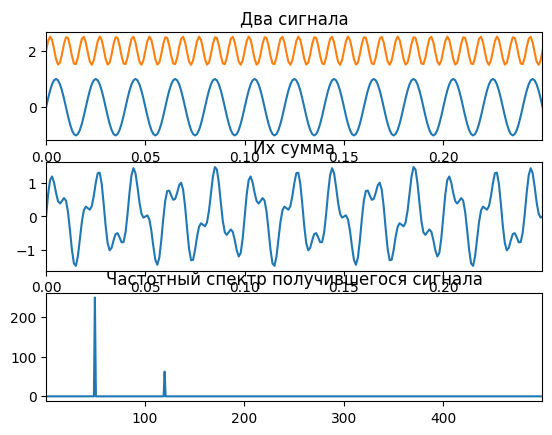

In [77]:
dt = 0.001
t = np.arange(0, 1, dt)
f = np.sin(2 * np.pi * 50 * t) + 1 / 2 * np.sin(2 * np.pi * 120 * t)

n = len(t)
fhat = np.fft.fft(f, n)                
PSD = fhat * np.conj(fhat) / n            
freq = (1 / (dt * n)) * np.arange(n)           
L = np.arange(1, np.floor(n / 2), dtype='int') 

fig,axs = plt.subplots(3, 1)
plt.sca(axs[0])
plt.title('Два сигнала')
plt.plot(t, np.sin(2 * np.pi * 50 * t))
plt.plot(t, 1 / 2 * np.sin(2 * np.pi * 120 * t) + 2)
plt.xlim(t[0], t[-1] / 4)

plt.sca(axs[1])
plt.title('Их сумма')
plt.plot(t, f)
plt.xlim(t[0], t[-1] / 4)

plt.sca(axs[2])
plt.title('Частотный спектр получившегося сигнала')
plt.plot(freq[L], PSD[L])
plt.xlim(freq[L[0]], freq[L[-1]])

plt.show()

И в этом и есть смысл преобразования Фурье. Некоторой функции от времени, мы сопоставили функцию от частоты

На самом деле можно сделать и обратных ход. Это называет обратное преобразование Фурье:
\begin{gather*}
f(x)={\frac {1}{\sqrt {2\pi }}}\int \limits _{-\infty }^{\infty }{\hat {f}}(\omega )e^{ix\omega }\,d\omega
\end{gather*}

# Сжатие данных

Но что же насчёт сжатия данных? Как эти идеи применимы здесь? На самом деле очень просто

Если мы умеем раскладывать что-то большое и сложное на простые компоненты, и мы можем оценить "важность" этих составляющих, то мы можем оставить только самое важное, а всё остально отбросить. Тем, кто знаком с SVD разложением, эта идея покажется знакомой.

Применим преобразование Фурье к изображению (нам понадобиться двумерное преобразование Фурье). Выглядит это довольно странно, но по сути это то же разложение сигнала в спектр

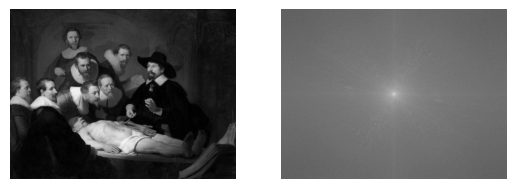

In [82]:
A = imread('assets/image.jpeg')
B = np.mean(A, -1)

fig,axs = plt.subplots(1,2)

img = axs[0].imshow(B)
img.set_cmap('gray')
axs[0].axis('off')

C = np.fft.fft2(B)

img = axs[1].imshow(np.fft.fftshift(np.log(np.abs(C))))
img.set_cmap('gray')
axs[1].axis('off')

plt.show()

Можем отсеять наименьшие составляющие и значительно уменьшить количество хранимой информации. Конечно, это повлечет за собой потерю качества

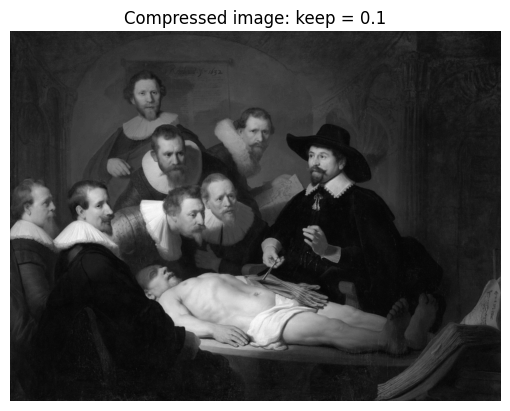

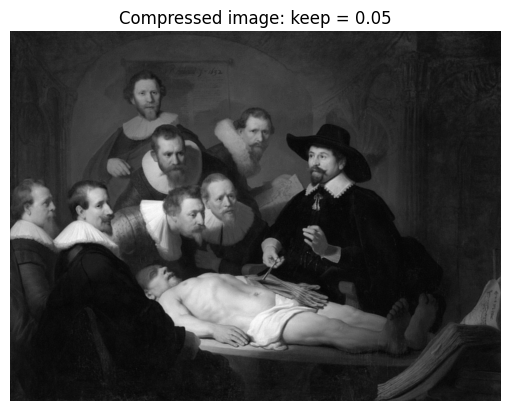

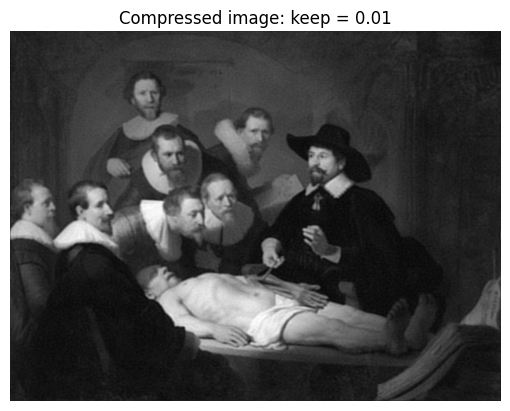

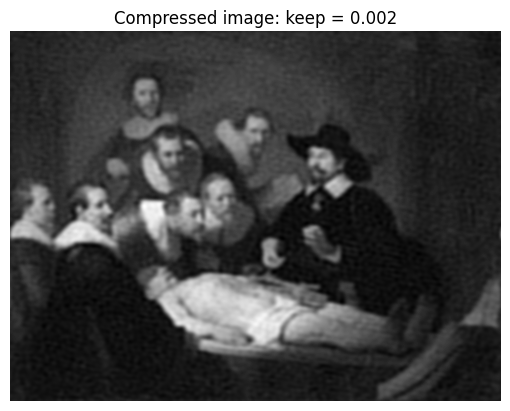

In [80]:
A = imread('assets/image.jpeg')
B = np.mean(A, -1)

Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh        
    Atlow = Bt * ind          
    Alow = np.fft.ifft2(Atlow).real
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep))

# Конец

Конечно, тема эта обширная и сложная, но, возможно, её большое практическое значение смотивирует разобрать в ней более досконально. Я не упомянул в своем рассказе Дискретное Преобразование Фурье, Быстрое Преобразование Фурье, хотя на самом деле они тут использовались. В общем есть еще много интересного, что предстоит изучить. 

Всех с наступающим!